<h2 align="center"> Global Optimization Algorithms</h2>
<h3 align="left">Name : Mert Gülşen </h3>

In [1]:
from global_optimization import naive_random_search
from global_optimization import simulated_annealing
from global_optimization import particle_swarm
from global_optimization import genetic_algorithm
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import warnings

np.random.seed(1881)
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

# Testing algorithms individually
## Function to optimize:
## $ f(x, y) = 3 \left(1 - x\right)^{2} e^{- x^{2} - \left(y + 1\right)^{2}} - 10 \left(x/5 -x^{3} -y^{5}\right) e^{- x^{2} - y^{2}} - e^{- \left(x + 1\right)^{2} - y^{2}} /3$

In [2]:
# original problem function
def problem(x):
    t1 = 3*(1-x[0])**2 * np.exp(-x[0]**2 - (x[1]+1)**2)
    t2 = -10*(x[0]/5-x[0]**3-x[1]**5) * np.exp(-x[0]**2-x[1]**2)
    t3 = -np.exp(-(x[0]+1)**2 - x[1]**2) / 3
    return t1 + t2 + t3

# terms are rearranged to avoid more big multiplications
def function(x, sign=1.0):  # sign is 1 if function
    t1 = np.exp(-x[0]**2-x[1]**2)
    t2 = 3*(1-x[0])*np.exp(-2*x[1]-1) - 10*(x[0]/5-x[0]**3-x[1]**5) - np.exp(-2*x[0]-1)/3
    return sign*(t1*t2)


In [3]:
# Global minimum point of the objective function
lw = [-3] * 2
up = [3] * 2
ret = scipy.optimize.dual_annealing(function, bounds=list(zip(lw, up)))
global_min_x = ret.x
global_min = function(global_min_x)
print("Global minimum point :", ret.x)
print("Global minimum cost :", global_min, end="\n\n")

# Global maximum point of the objective function
lw = [-3] * 2
up = [3] * 2
ret = scipy.optimize.dual_annealing(function, bounds=list(zip(lw, up)), args=[-1])  # multiply the function with -1 to maximize
global_max_x = ret.x
global_max = function(global_max_x)
print("Global maximum point :", ret.x)
print("Global maximum cost :", global_max)

Global minimum point : [ 0.1595674  -1.64665797]
Global minimum cost : -6.246988142522449

Global maximum point : [-0.0090782   1.58137731]
Global maximum cost : 8.106178040229167


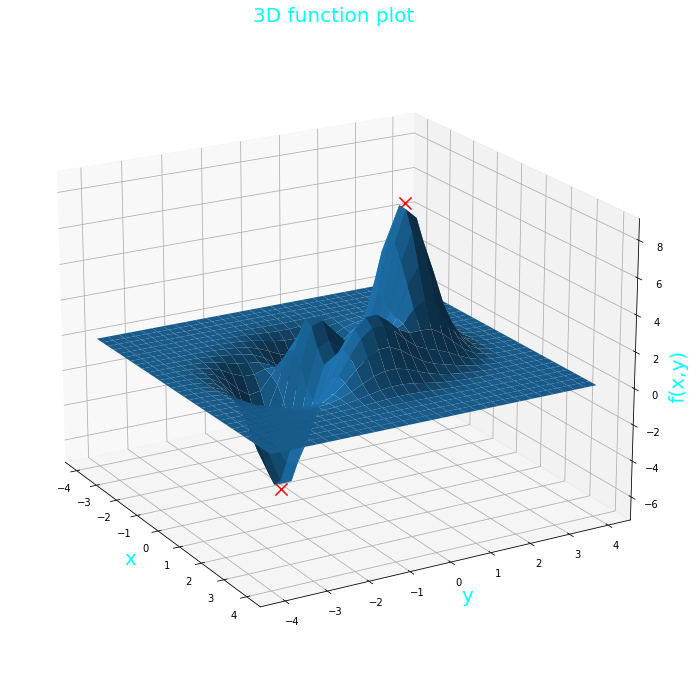

In [4]:
x = np.linspace(-4, 4, 30)
y = np.linspace(-4, 4, 30)

X, Y = np.meshgrid(x, y)

Z = function([X, Y])


fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.scatter(global_min_x[0], global_min_x[1], global_min, s=150, marker="x", color='red')
ax.scatter(global_max_x[0], global_max_x[1], global_max, s=150, marker="x", color='red')
ax.view_init(20, -30)
font = {"size":20, "color":"cyan"}
ax.set_xlabel('x', fontdict=font)
ax.set_ylabel('y', fontdict=font)
ax.set_zlabel('f(x,y)', fontdict=font)
plt.title("3D function plot", fontdict=font)
plt.show()

Global minimum and global maximum points are marked in the plot.

# Naive random search algorithm

In [5]:
iters = [5, 10, 20, 50, 100, 200]

def print_line():
    print("-"*75, end="\n\n")

print("Gaussian distribution neighbourhood results:", end="\n\n")
for itr in iters:
    x, cost, time = naive_random_search(function, np.random.uniform(-3, 3, 2), "min", "normal", itr)
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

print_line()
print("Uniform distribution neighbourhood results:")
for itr in iters:
    x, cost, time = naive_random_search(function, np.random.uniform(-3, 3, 2), "min", "uniform", itr)
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

results = [0, 0]
converged_1e1 = 0
converged_1e2 = 0
for i in range(100):
    initial_point = np.random.uniform(-3, 3, 2)
    x1, cost1, time1 = simulated_annealing(function, initial_point, "min", gamma=0.1, neighborhood="normal")
    x2, cost2, time2 = simulated_annealing(function, initial_point, "min", gamma=0.1, neighborhood="uniform")
    if cost1 < cost2:
        results[0] += 1
        if abs(cost1-global_min) < 10**-1:
            converged_1e1 += 1
        if abs(cost1-global_min) < 10**-2:
            converged_1e2 += 1
    else:
        results[1] += 1
        if abs(cost2-global_min) < 10**-1:
            converged_1e1 += 1
        if abs(cost2-global_min) < 10**-2:
            converged_1e2 += 1

print_line()
print("Scores out of 100 trials:")
print("Gaussian distribution neighbourhood:", results[0])
print("Uniform distribution neighbourhood:", results[1])
print("Number of times converged with 10^-1 absolute tolerance :", converged_1e1)
print("Number of times converged with 10^-2 absolute tolerance :", converged_1e2)

Gaussian distribution neighbourhood results:

Number of iterations: 5
Found minimum point: [-2.479392220574112, -0.7752489471357537]
Found minimum cost -0.17547145281080478
Execution time: 0.0

Number of iterations: 10
Found minimum point: [-5.651504563516941, 7.308429187129029]
Found minimum cost 1.6818332941134615e-32
Execution time: 0.0

Number of iterations: 20
Found minimum point: [-0.730178535571621, 8.613776763530087]
Found minimum cost 1.6634269265725485e-27
Execution time: 0.0009851455688476562

Number of iterations: 50
Found minimum point: [0.4086571438570843, -1.413835498001647]
Found minimum cost -5.233298240912851
Execution time: 0.0

Number of iterations: 100
Found minimum point: [0.2699575949722761, -1.5946979117009432]
Found minimum cost -6.139517171607249
Execution time: 0.0009984970092773438

Number of iterations: 200
Found minimum point: [0.03972345384853357, -1.7075099044379727]
Found minimum cost -6.1174873138955075
Execution time: 0.0009999275207519531

----------

From different experiments of naive random search, it can be seen that as the number of iterations increase, generally found minimum gets better. And gaussian probability distribution neighbourhood is better and more reliable than uniform distribution as it can be seen that 64 out of 100 times, gaussian distribution was better.


# Simulated annealing algorithm

In [6]:
print("Gaussian distribution neighbourhood results:", end="\n\n")
for itr in iters:
    x, cost, time = simulated_annealing(function, np.random.uniform(-3, 3, 2), "min", gamma=0.1, neighborhood="normal")
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

print_line()
print("Uniform distribution neighbourhood results:")
for itr in iters:
    x, cost, time = simulated_annealing(function, np.random.uniform(-3, 3, 2), "min", gamma=0.1, neighborhood="uniform")
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

results = [0, 0]
converged_1e1 = 0
converged_1e2 = 0
for i in range(100):
    initial_point = np.random.uniform(-3, 3, 2)
    x1, cost1, time1 = simulated_annealing(function, initial_point, "min", gamma=0.1, neighborhood="normal")
    x2, cost2, time2 = simulated_annealing(function, initial_point, "min", gamma=0.1, neighborhood="uniform")
    if cost1 < cost2:
        results[0] += 1
        if abs(cost1-global_min) < 10**-1:
            converged_1e1 += 1
        if abs(cost1-global_min) < 10**-2:
            converged_1e2 += 1
    else:
        results[1] += 1
        if abs(cost2-global_min) < 10**-1:
            converged_1e1 += 1
        if abs(cost2-global_min) < 10**-2:
            converged_1e2 += 1

print_line()
print("Scores out of 100 trials:")
print("Gaussian distribution:", results[0])
print("Uniform distribution:", results[1])
print("Number of times converged with 10^-1 absolute tolerance out of 100 trials:", converged_1e1)
print("Number of times converged with 10^-2 absolute tolerance out of 100 trials:", converged_1e2)

Gaussian distribution neighbourhood results:

Number of iterations: 5
Found minimum point: [0.14558760375083335, -1.6791037468886991]
Found minimum cost -6.231813540626555
Execution time: 0.001997232437133789

Number of iterations: 10
Found minimum point: [0.13756111045208846, -1.5036282097054199]
Found minimum cost -5.927972242138055
Execution time: 0.0019996166229248047

Number of iterations: 20
Found minimum point: [-1.42873817533181, -0.057390706100904854]
Found minimum cost -3.2923586498377198
Execution time: 0.0030312538146972656

Number of iterations: 50
Found minimum point: [0.1590397322420567, -1.6204294662320908]
Found minimum cost -6.236924249079029
Execution time: 0.0029702186584472656

Number of iterations: 100
Found minimum point: [0.3361219982699877, -1.5136807173748916]
Found minimum cost -5.84433659292207
Execution time: 0.0019888877868652344

Number of iterations: 200
Found minimum point: [-7.8415509117624955, 7.591615820184499]
Found minimum cost -1.0074453923762706e

It is seen that for simulated annealing algorithm, gaussian distribution neighbour is a better choice.

# Particle Swarm Optimization

In [7]:
iters = [1, 5, 10, 20, 100]

# Experiment with different number of particles
particles = 10
print("Experiment with number of particles =", particles, end="\n\n")
for itr in iters:
    x, cost, time = particle_swarm(function, 2, "min", particles, iters=itr)
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

print_line()

particles = 100
print("Experiment with number of particles =", particles, end="\n\n")
for itr in iters:
    x, cost, time = particle_swarm(function, 2, "min", particles, iters=itr)
    print("Number of iterations:", itr)
    print("Found minimum point:", x)
    print("Found minimum cost", cost)
    print("Execution time:", time, end="\n\n")

converged_1e1 = 0
converged_1e2 = 0
converged_1e3 = 0
for i in range(100):
    x1, cost1, time1 = particle_swarm(function, 2, "min", particles)
    if abs(cost1-global_min) < 10**-1:
        converged_1e1 += 1
    if abs(cost1-global_min) < 10**-2:
        converged_1e2 += 1
    if abs(cost1-global_min) < 10**-3:
        converged_1e3 += 1

print_line()
print("Scores out of 100 trials:")
print("Number of times converged with 10^-1 absolute tolerance out of 100 trials:", converged_1e1)
print("Number of times converged with 10^-2 absolute tolerance out of 100 trials:", converged_1e2)
print("Number of times converged with 10^-3 absolute tolerance out of 100 trials:", converged_1e3)

Experiment with number of particles = 10

Number of iterations: 1
Found minimum point: [-2.59435243  0.30086718]
Found minimum cost -0.2063193483810823
Execution time: 0.0010008811950683594

Number of iterations: 5
Found minimum point: [-1.03970684 -0.30878041]
Found minimum cost -1.8486937934241041
Execution time: 0.00099945068359375

Number of iterations: 10
Found minimum point: [-0.37101713 -1.51760501]
Found minimum cost -4.27148658553723
Execution time: 0.002012491226196289

Number of iterations: 20
Found minimum point: [ 0.16100797 -1.65295803]
Found minimum cost -6.246377574483505
Execution time: 0.003992795944213867

Number of iterations: 100
Found minimum point: [ 0.15956731 -1.64665748]
Found minimum cost -6.2469881425248435
Execution time: 0.014993667602539062

---------------------------------------------------------------------------

Experiment with number of particles = 100

Number of iterations: 1
Found minimum point: [ 0.22533402 -1.71338331]
Found minimum cost -6.1449

It is seen that Particle swarm optimization (pso) is a very robust algorithm. With enough iterations, it always converges to global minimum. When particles are increased, algorithm converges with even smaller number of iterations. But execution time of each iteration increases.

# Genetic Algorithm

In [8]:
iters = [1, 5, 10, 20, 100]

# Experiment with different choice of schemas

members = 40
bits = 16
pm = 0.1
print("Experiment with schema 1 (16 bit binary encoding) :", end="\n\n")
for itr in iters:
    x, cost, time = genetic_algorithm(function, 2, members, bits=bits, pm=pm)
    print("Number of iterations:", itr)
    print("Found maximum point:", x)
    print("Found maximum cost", cost)
    print("Execution time:", time, end="\n\n")

print_line()

members = 40
bits = 32
pm = 0.1
print("Experiment with schema 2 (32 bit binary encoding) :", end="\n\n")
for itr in iters:
    x, cost, time = genetic_algorithm(function, 2, members, bits=bits, pm=pm)
    print("Number of iterations:", itr)
    print("Found maximum point:", x)
    print("Found maximum cost", cost)
    print("Execution time:", time, end="\n\n")


results = [0, 0, 0, 0]
converged_1e1 = 0
converged_1e2 = 0
converged_1e3 = 0
for i in range(100):
    members = 50
    x0, cost0, time0 = genetic_algorithm(function, 2, members, bits=8, iters=20)
    x1, cost1, time1 = genetic_algorithm(function, 2, members, bits=16, iters=20)
    x2, cost2, time2 = genetic_algorithm(function, 2, members, bits=32, iters=20)
    x3, cost3, time3 = genetic_algorithm(function, 2, members, bits=64, iters=20)
    costs = [cost0, cost1, cost2, cost3]
    best_cost = costs[np.argmax(costs)]
    results[np.argmax(costs)] += 1
    if abs(best_cost-global_max) < 10**-1:
        converged_1e1 += 1
    if abs(best_cost-global_max) < 10**-2:
        converged_1e2 += 1
    if abs(best_cost-global_max) < 10**-3:
        converged_1e3 += 1

print_line()
print("Scores out of 100 trials:")
print("8 bit encoding schema:", results[0])
print("16 bit encoding schema:", results[1])
print("32 bit encoding schema:", results[2])
print("64 bit encoding schema:", results[3])
print("Number of times converged with 10^-1 absolute tolerance out of 100 trials:", converged_1e1)
print("Number of times converged with 10^-2 absolute tolerance out of 100 trials:", converged_1e2)
print("Number of times converged with 10^-3 absolute tolerance out of 100 trials:", converged_1e3)

Experiment with schema 1 (16 bit binary encoding) :

Number of iterations: 1
Found maximum point: [0.02018769 1.60563058]
Found maximum cost 8.090070605603728
Execution time: 0.12405085563659668

Number of iterations: 5
Found maximum point: [-0.0049897   1.58603799]
Found maximum cost 8.105699102696034
Execution time: 0.12598204612731934

Number of iterations: 10
Found maximum point: [0.00205997 1.59995422]
Found maximum cost 8.099693780375834
Execution time: 0.12000465393066406

Number of iterations: 20
Found maximum point: [0.00801099 1.60810254]
Found maximum cost 8.092507649596447
Execution time: 0.12299656867980957

Number of iterations: 100
Found maximum point: [-0.01625086  1.57633326]
Found maximum cost 8.1053629231872
Execution time: 0.12002444267272949

---------------------------------------------------------------------------

Experiment with schema 2 (32 bit binary encoding) :

Number of iterations: 1
Found maximum point: [-0.01186387  1.57379315]
Found maximum cost 8.1051

From the results of experiments, it can be seen that genetic algorithm almost always converges to global maximum. Genetic algorithm can converge with very small number of iterations. Experiment with different representation schemas shows that 32 bit binary encoding is the best option.

## Comparing algorithms for maximizing the objective function

In [9]:
obj = "max"

iterations = [1, 5, 25, 50]

trials = 100

names = ["Naive random search", "Simulated Annealing",
         "Particle Swarm Optimization", "Genetic Algorithm"]

for itr in iterations:
    count = [0, 0, 0, 0]

    for _ in range(trials):
        x_in = np.random.uniform(-3, 3, 2)
        result = naive_random_search(function, x_in, "max", neighborhood="normal", iters=itr)
        result2 = simulated_annealing(function, x_in, "max", neighborhood="normal", gamma=0.1, iters=itr)
        result3 = particle_swarm(function, 2, "max", iters=itr)
        result4 = genetic_algorithm(function, 2, iters=itr)

        count[np.argmax([result[1], result2[1], result3[1], result4[1]])] += 1
    print("Number of iterations =", itr, end="\n\n")
    print("Scores out of of 100 trials")
    for a in range(len(count)):
        print(names[a], ":", count[a])
    print()
    print_line()

Number of iterations = 1

Scores out of of 100 trials
Naive random search : 2
Simulated Annealing : 1
Particle Swarm Optimization : 9
Genetic Algorithm : 88

---------------------------------------------------------------------------

Number of iterations = 5

Scores out of of 100 trials
Naive random search : 3
Simulated Annealing : 4
Particle Swarm Optimization : 18
Genetic Algorithm : 75

---------------------------------------------------------------------------

Number of iterations = 25

Scores out of of 100 trials
Naive random search : 0
Simulated Annealing : 0
Particle Swarm Optimization : 77
Genetic Algorithm : 23

---------------------------------------------------------------------------

Number of iterations = 50

Scores out of of 100 trials
Naive random search : 0
Simulated Annealing : 0
Particle Swarm Optimization : 100
Genetic Algorithm : 0

---------------------------------------------------------------------------



Comparison of algorithms show that 2 best algorithms for this objective function are Particle Swarm Optimization and Genetic Algorithm. Comparing these two algorithms, genetic algorithms works better than PSO with fewer iterations while PSO converges better than Genetic algorithm with more iterations.